<a href="https://colab.research.google.com/github/chenlinzhe/my/blob/master/%E2%80%9Cyolo_yyan_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r /content/drive/MyDrive/yyan /content/

In [ ]:
import os
!cp /content/yolov5/runs/detect/exp/crops/handwrite/0165.jpg /content/yolov5/runs/detect/exp/crops/handwrite/0168.jpg


In [4]:
%cd /content/yyan/yolov5

/content/yyan/yolov5


In [5]:
ls

benchmarks.py    data/       LICENSE         README.md         segment/        val.py
CITATION.cff     detect.py   models/         README.zh-CN.md   train.py        yolov5s.pt
classify/        export.py   __pycache__/    requirements.txt  tutorial.ipynb  yyan/
CONTRIBUTING.md  hubconf.py  pyproject.toml  runs/             utils/


In [7]:
!python train.py --epochs 5000 --data yyan/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=yyan/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5000, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

In [8]:
!python detect.py --source yyan/train/images/002.jpg  --weights runs/train/exp5/weights/best.pt --save-crop --save-txt

detect: weights=['runs/train/exp5/weights/best.pt'], source=yyan/train/images/002.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yyan/yolov5/yyan/train/images/002.jpg: 640x480 30 handwrites, 93.1ms
Speed: 1.0ms pre-process, 93.1ms inference, 2.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4
1 labels saved to runs/detect/exp4/labels


In [ ]:
INPUTIMG ='/content/drive/MyDrive/yolo2/yolov5/runs/detect/exp3/crops/handwrite/0025.jpg'
OUTIMG='/content/drive/MyDrive/yolo2/yolov5/runs/detect/exp3/crops/handwrite/1025.jpg'

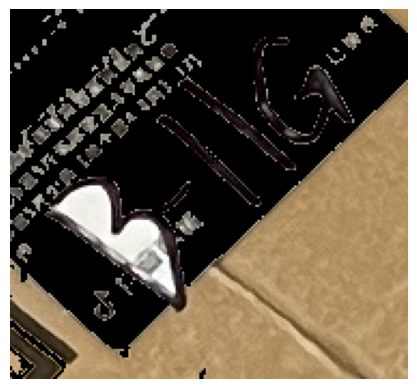

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 加载图片
image = cv2.imread(INPUTIMG)

# 将图片转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用自适应阈值化方法进行二值化处理
# 可调参数：blockSize：用于计算每个像素的邻域大小，越大则去除背景的强度越大
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 执行形态学操作（开运算）去除噪声
# 可调参数：kernelSize：形态学核的大小，越大则去除背景的强度越大
kernelSize = 1
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 寻找轮廓
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 创建一个掩码图像来绘制轮廓
mask = np.zeros_like(gray)

# 绘制轮廓
cv2.drawContours(mask, contours, -1, (255,255,255), thickness=cv2.FILLED)

# 将掩码应用到原始图像上以去除背景
result = cv2.bitwise_and(image, image, mask=mask)

# 显示新的图片
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# 保存结果
cv2.imwrite(OUTIMG, result)


In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# 加载预训练的模型
model = models.resnet18(pretrained=True)
model.eval()

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 加载图像并进行预处理
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)
    return image

# 比较两个图像的相似度
def compare_images(image1_path, image2_path):
    image1 = load_and_preprocess_image(image1_path)
    image2 = load_and_preprocess_image(image2_path)

    with torch.no_grad():
        features1 = model(image1)
        features2 = model(image2)

    # 计算余弦相似度
    cosine_similarity = torch.nn.functional.cosine_similarity(features1, features2).item()
    return cosine_similarity

# 示例用法
image1_path = '/content/yolov5/runs/detect/exp3/crops/handwrite/00213.jpg'
image2_path = '/content/yolov5/runs/detect/exp3/crops/handwrite/00217.jpg'
similarity = compare_images(image1_path, image2_path)
print('相似度:', similarity)


相似度: 0.8104641437530518


In [ ]:
!pip install imagehash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
image1_path = '/content/yolov5/runs/detect/exp3/crops/handwrite/00213.jpg'
image2_path = '/content/yolov5/runs/detect/exp3/crops/handwrite/00217.jpg'

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# 加载预训练的 ResNet 模型
resnet = models.resnet50(pretrained=True)
resnet.eval()

# 图像预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 加载图像并进行预处理
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)
    return image

# 提取图像的特征向量
def extract_features(image_path):
    image = load_and_preprocess_image(image_path)
    with torch.no_grad():
        features = resnet(image)
    return features.squeeze().numpy()

# 计算两个图像特征向量之间的余弦相似度
def cosine_similarity(feature1, feature2):
    dot_product = np.dot(feature1, feature2)
    norm_feature1 = np.linalg.norm(feature1)
    norm_feature2 = np.linalg.norm(feature2)
    similarity = dot_product / (norm_feature1 * norm_feature2)
    return similarity



# 提取图像特征向量
feature1 = extract_features(image1_path)
feature2 = extract_features(image2_path)

# 计算余弦相似度
similarity = cosine_similarity(feature1, feature2)
print('相似度:', similarity)


相似度: 0.83431


In [ ]:
import cv2
import numpy as np

# 加载图片
image = cv2.imread('input_image.jpg')

# 将图片转换为灰度图像
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 使用自适应阈值化方法进行二值化处理
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# 执行形态学操作（开运算）去除噪声
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 寻找轮廓
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 创建一个掩码图像来绘制轮廓
mask = np.zeros_like(gray)

# 绘制轮廓
cv2.drawContours(mask, contours, -1, (255,255,255), thickness=cv2.FILLED)

# 将掩码应用到原始图像上以去除背景
result = cv2.bitwise_and(image, image, mask=mask)

# 显示新的图片
cv2.imshow('New Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 保存结果
cv2.imwrite('output_image.jpg', result)


In [ ]:
import os
!cp /content/yolov5/runs/detect/exp/crops/handwrite/0165.jpg /content/yolov5/runs/detect/exp/crops/handwrite/0168.jpg
